# Add 30% of outlier

In [1]:
import sys
import os 
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import outliers_utils, sanity_checks_methods
import pandas as pd
import ML_algorithms
from sklearn.metrics import classification_report

# Return to previous directory
os.chdir('..')

df = pd.read_csv('dataset/stroke_data.csv')

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])

df = sanity_checks_methods.clean_dataset(df)
df_clean = df.copy()

## Age

In [2]:
df = df_clean.copy()

In [3]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'age')

--------------------------------------
no outliers detected


In [4]:
df_age = outliers_utils.outliers_replace(df, 'age', 30)

Outliers found:


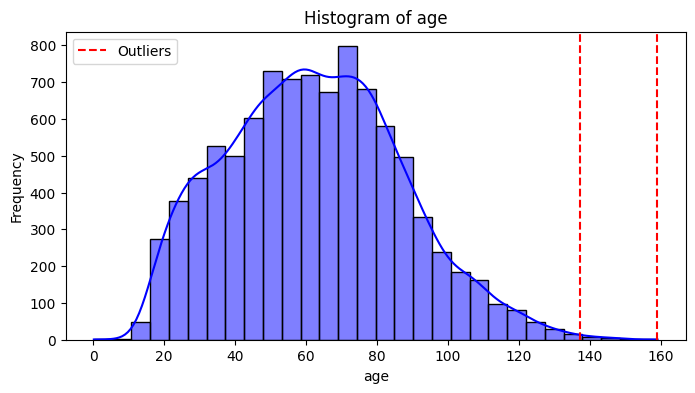

In [5]:
outliers_utils.visualize_outliers_specific(df_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1434
           1       0.83      0.92      0.88      1375

    accuracy                           0.87      2809
   macro avg       0.88      0.87      0.87      2809
weighted avg       0.88      0.87      0.87      2809

Node Labels:
 Annotation(0.581309, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6554\nvalue = [3307.0, 3247.0]\nclass = 0')


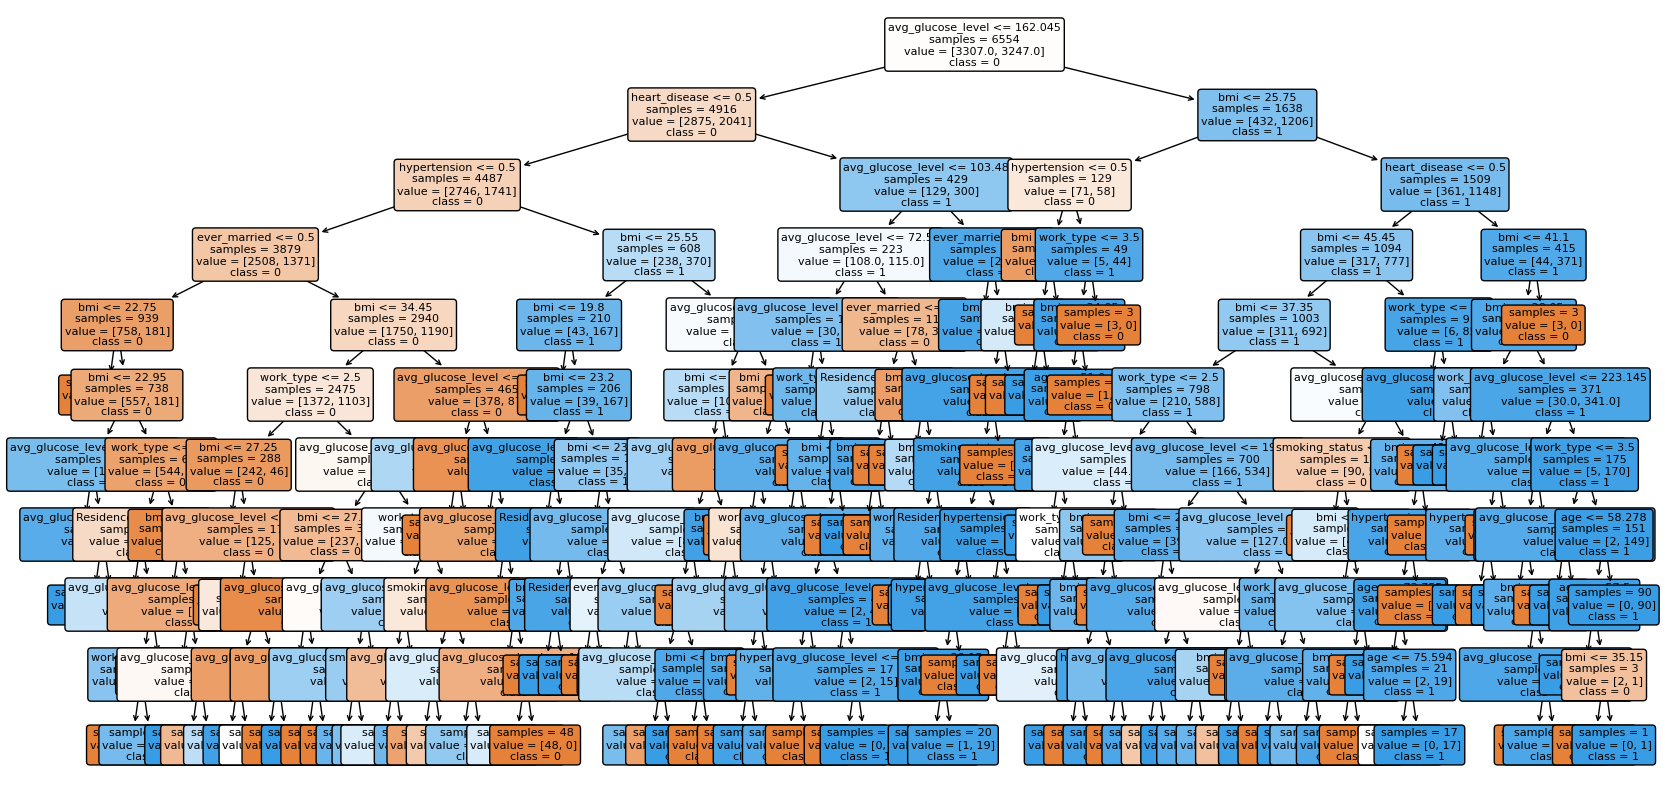

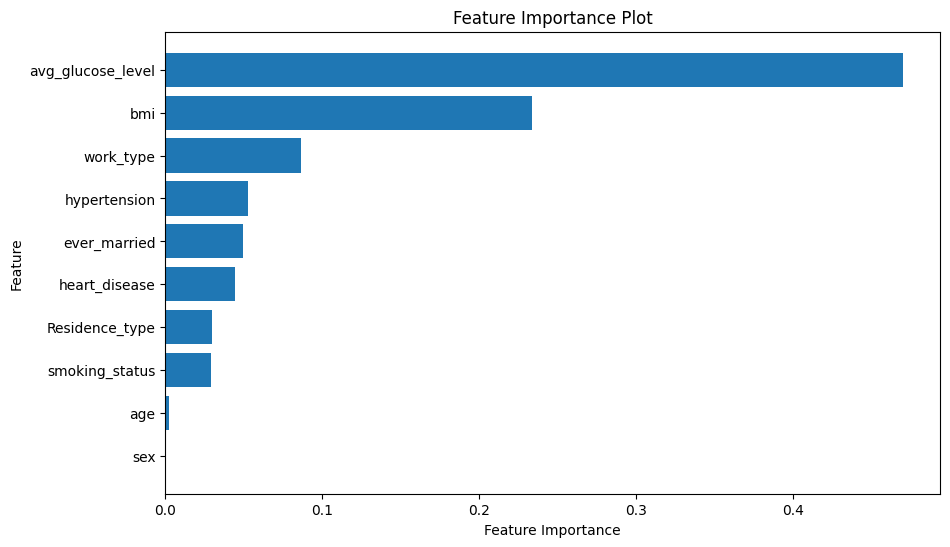

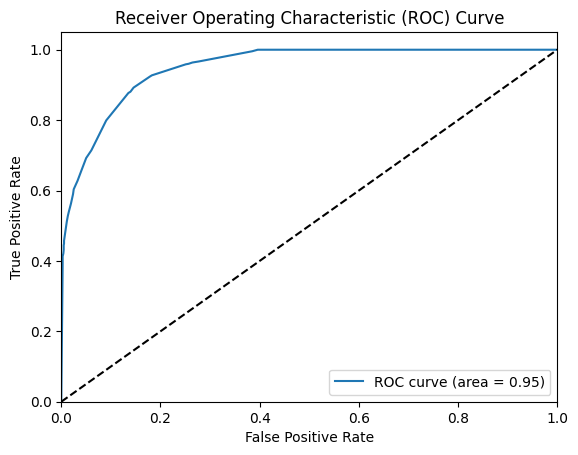

AUC Score: 0.9491253962216306


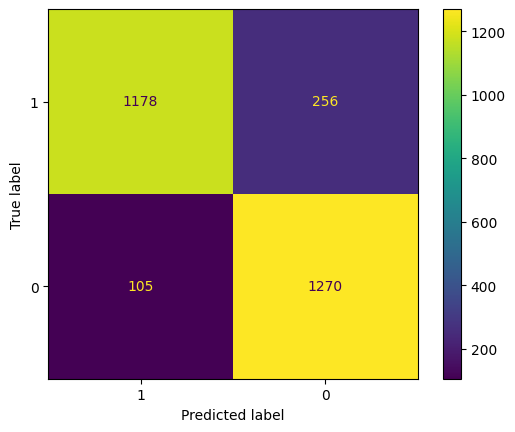

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7651245551601423, 0.8185053380782918, 0.8434163701067615, 0.8398576512455516, 0.7900355871886121, 0.8042704626334519, 0.8469750889679716, 0.8220640569395018, 0.8469750889679716, 0.85]
Mean accuracy: 0.8227224199288257
95% confidence interval: (0.8022280847254021, 0.8432167551322493)


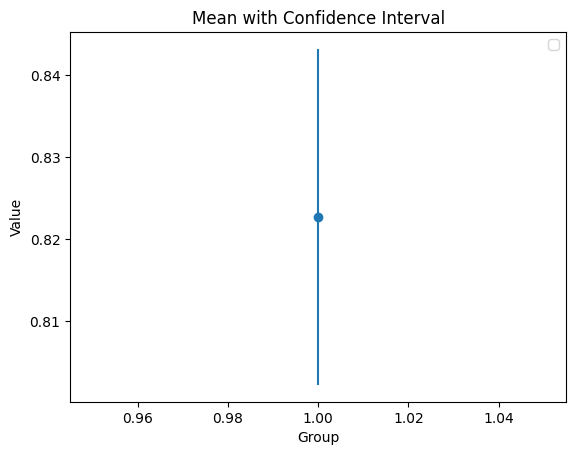

In [6]:
y_pred_prob_age_dt, y_test_age_dt, classification_report_dt_age, decision_tree = ML_algorithms.model_dt(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1434
           1       0.87      0.91      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809



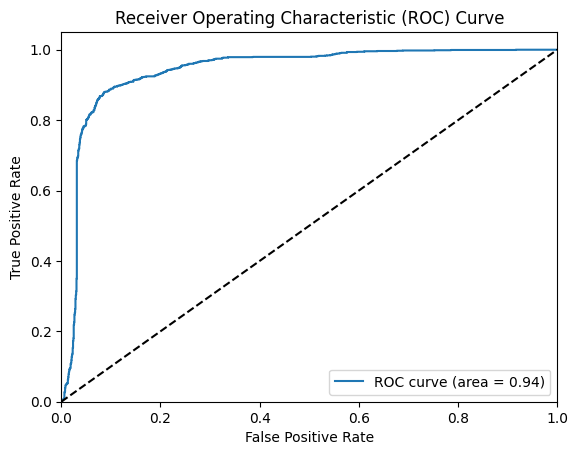

AUC Score: 0.9403813870926843


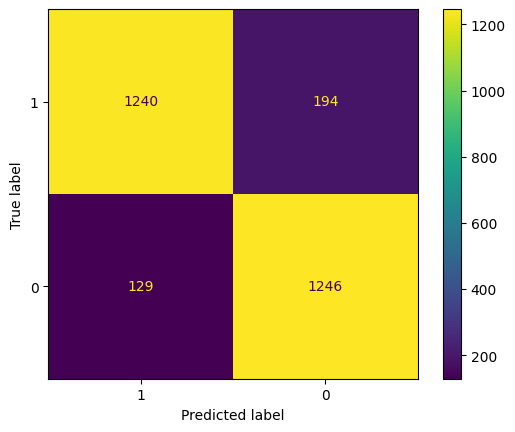

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7829181494661922, 0.7473309608540926, 0.7508896797153025, 0.8185053380782918, 0.7864768683274022, 0.7686832740213523, 0.7615658362989324, 0.7758007117437722, 0.7392857142857143]
Mean accuracy: 0.7732168276563295
95% confidence interval: (0.7554367917471719, 0.790996863565487)


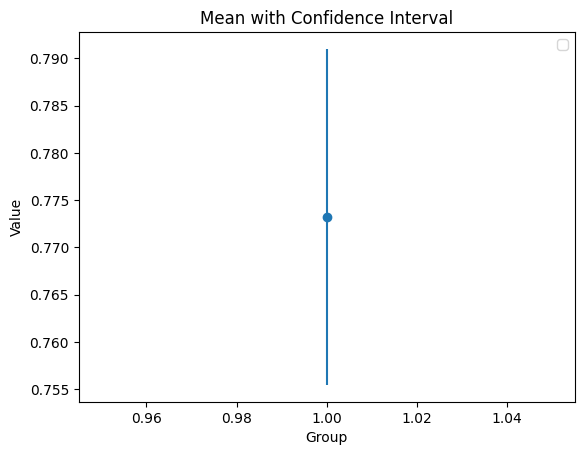

In [7]:
y_pred_prob_age_svm, y_test_age_svm, classification_report_svm_age, svm = ML_algorithms.model_svm(df_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [8]:
df_mean_age = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_age, 'age')

Outliers found:


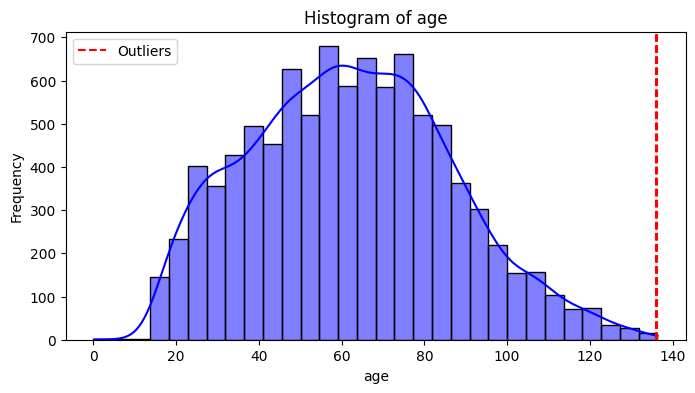

In [9]:
outliers_utils.visualize_outliers_specific(df_mean_age, 'age')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1434
           1       0.83      0.92      0.88      1375

    accuracy                           0.87      2809
   macro avg       0.88      0.87      0.87      2809
weighted avg       0.88      0.87      0.87      2809

Node Labels:
 Annotation(0.581309, 0.954545, 'avg_glucose_level <= 162.045\nsamples = 6554\nvalue = [3307.0, 3247.0]\nclass = 0')


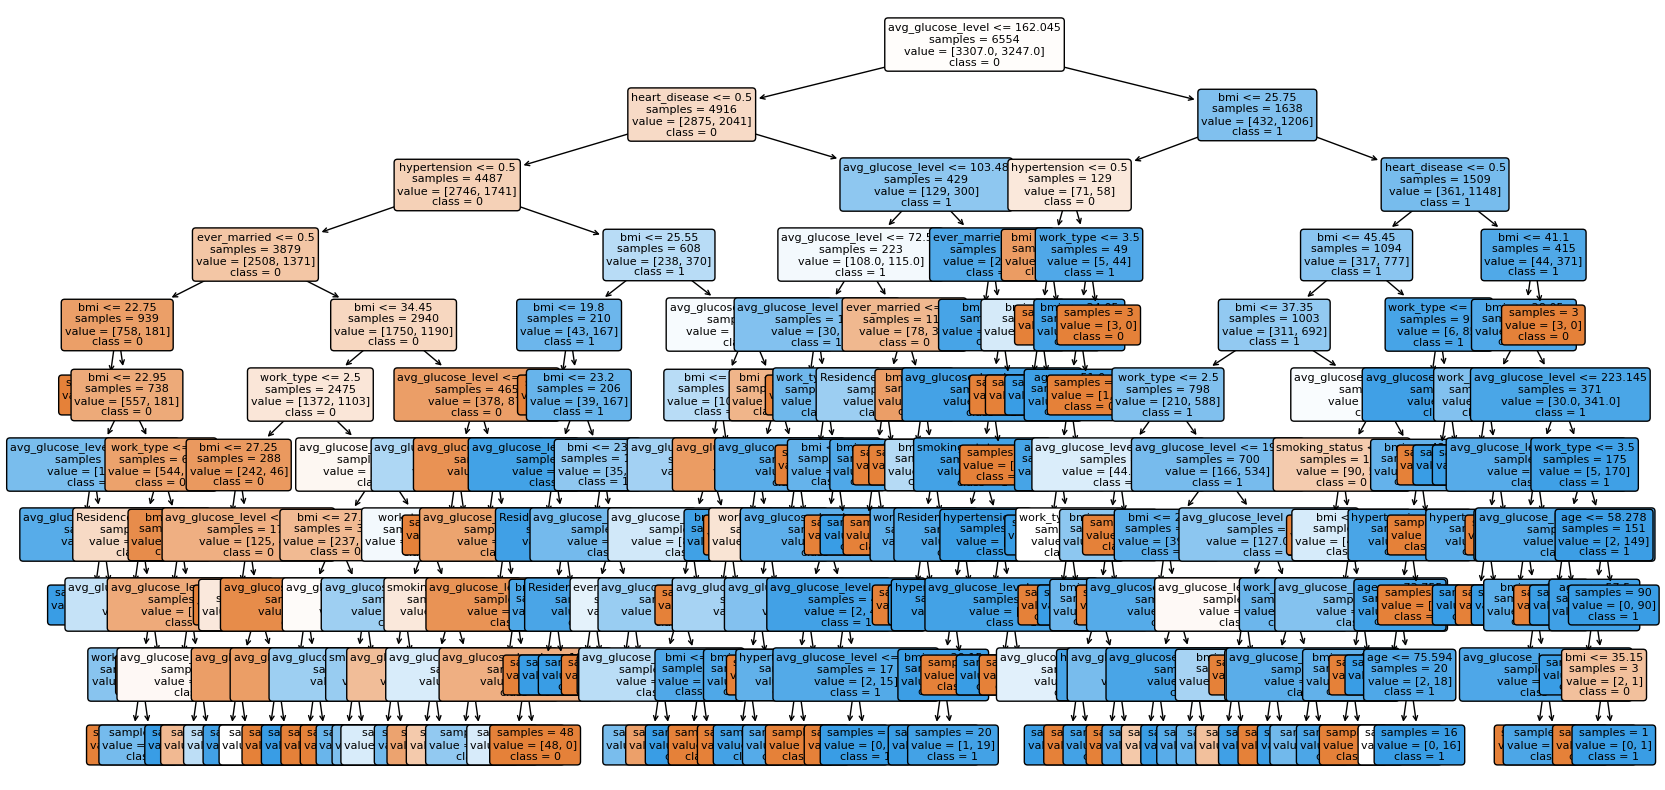

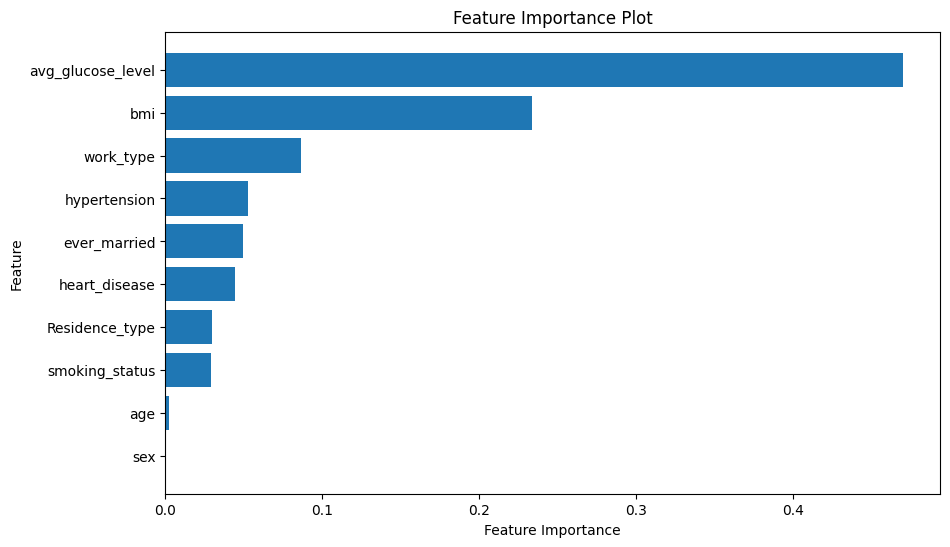

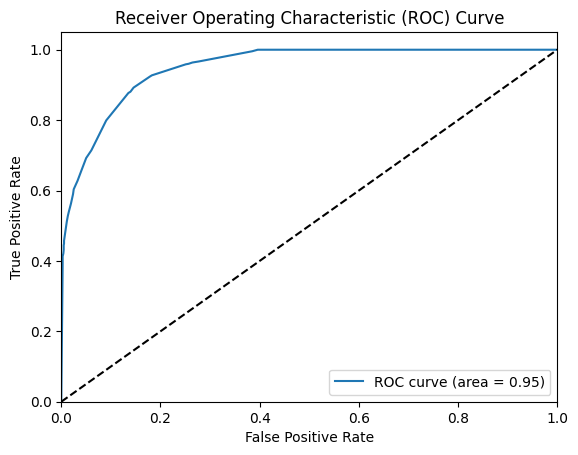

AUC Score: 0.9491253962216306


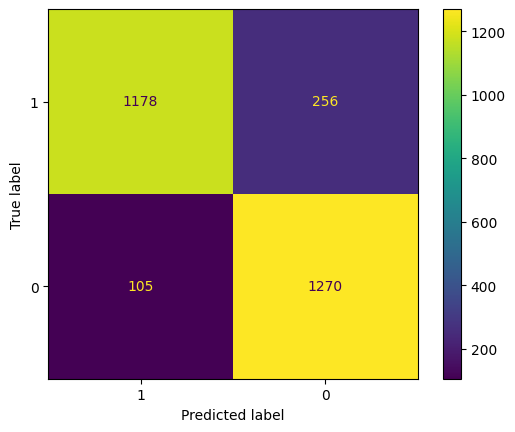

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8540925266903915, 0.8540925266903915, 0.8362989323843416, 0.8718861209964412, 0.8291814946619217, 0.800711743772242, 0.7758007117437722, 0.8185053380782918, 0.8327402135231317, 0.8071428571428572]
Mean accuracy: 0.8280452465683782
95% confidence interval: (0.8075675763526758, 0.8485229167840805)


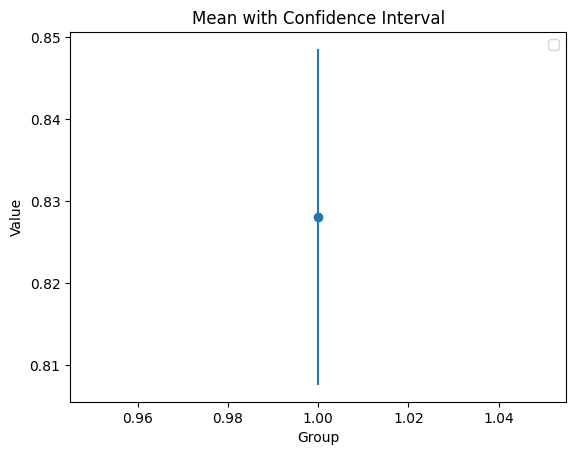

In [10]:
y_prob_dt_20_age, y_test_dt_20_age, classification_report_dt_20_age, decision_tree = ML_algorithms.model_dt(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1434
           1       0.86      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.89      0.88      0.88      2809



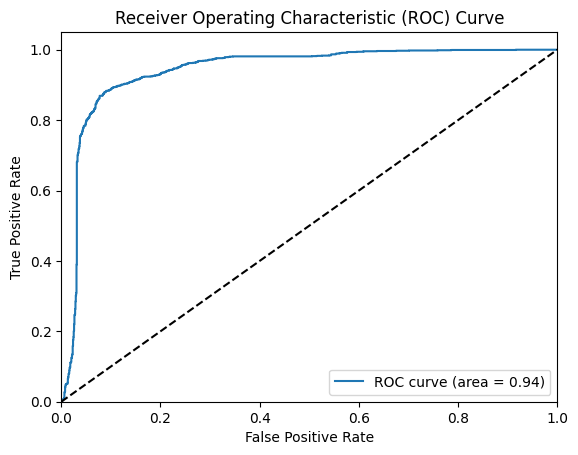

AUC Score: 0.9407663243311777


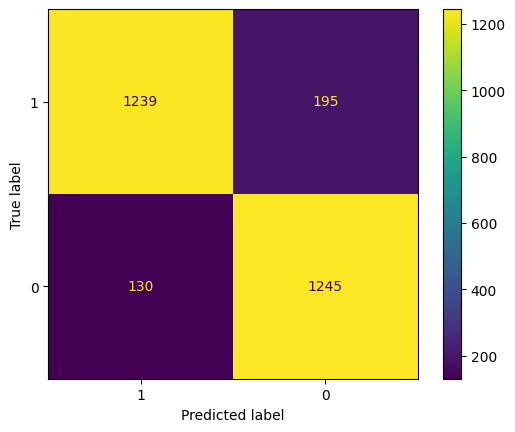

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7686832740213523, 0.7864768683274022, 0.800711743772242, 0.708185053380783, 0.8185053380782918, 0.7651245551601423, 0.7473309608540926, 0.7793594306049823, 0.7642857142857142]
Mean accuracy: 0.7739374682257244
95% confidence interval: (0.7515224831114099, 0.7963524533400389)


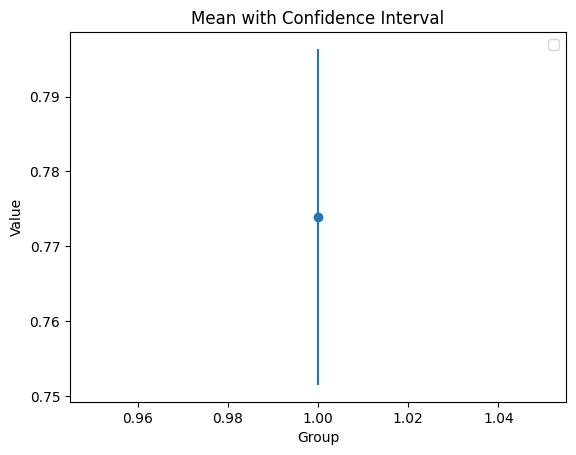

--------------------------------------


In [11]:
y_prob_svm_20_age, y_test_svm_20_age, classification_report_svm_20_age, svm = ML_algorithms.model_svm(df_mean_age, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## avg_glucose_level

In [12]:
df = df_clean.copy()

In [13]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'avg_glucose_level')

--------------------------------------
no outliers detected


In [14]:
df_glucose = outliers_utils.outliers_replace(df, 'avg_glucose_level', 30)

Outliers found:


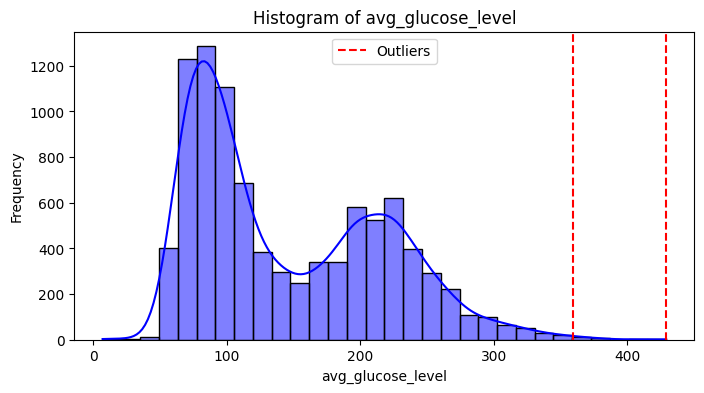

In [15]:
outliers_utils.visualize_outliers_specific(df_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1434
           1       0.77      0.92      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Node Labels:
 Annotation(0.541568, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3333.0, 3221.0]\nclass = 0')


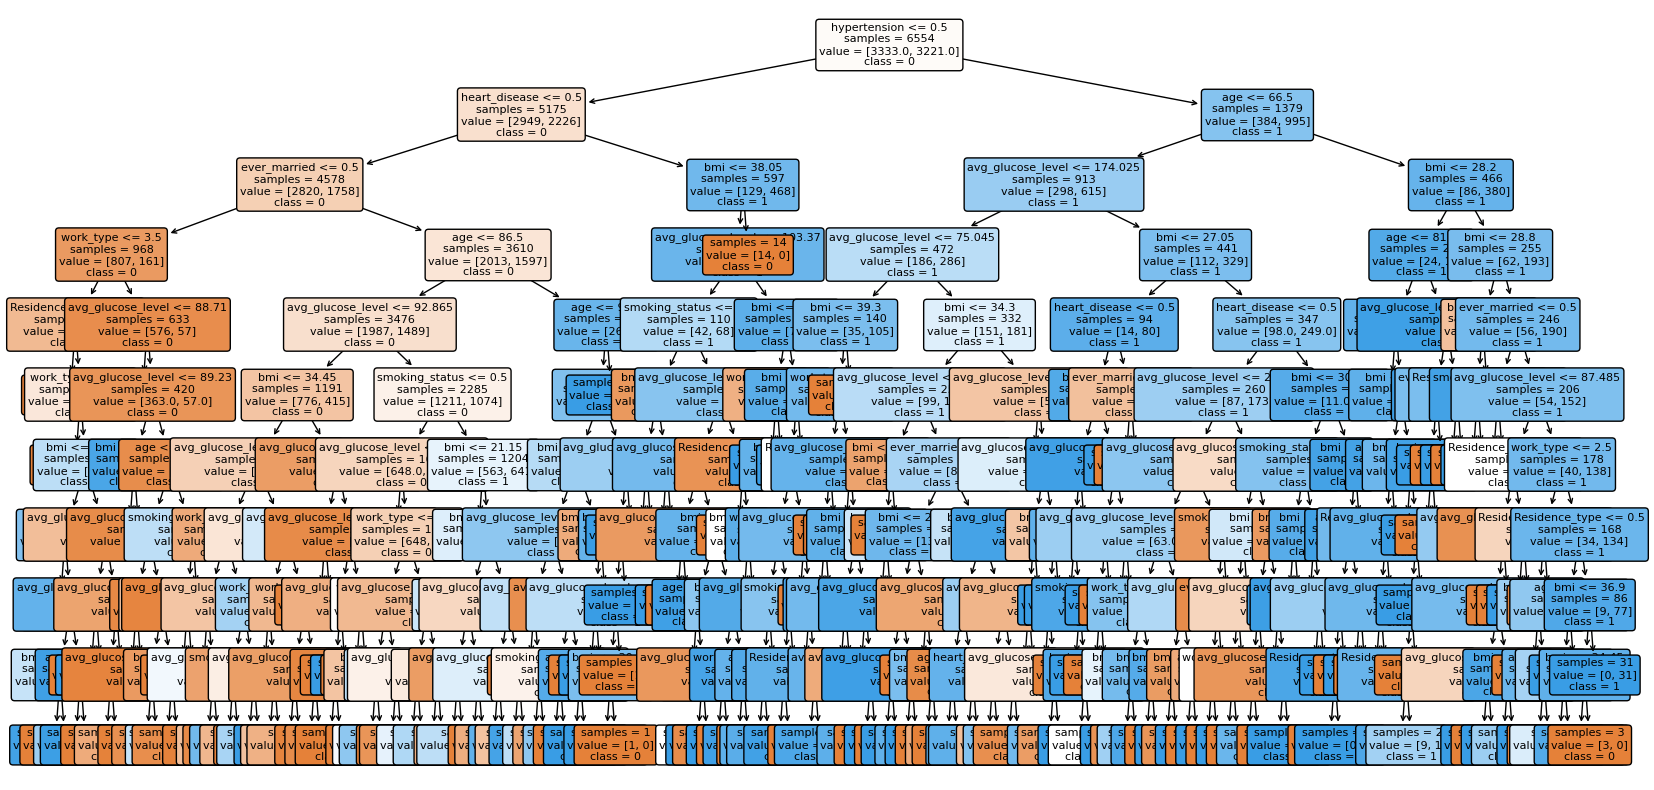

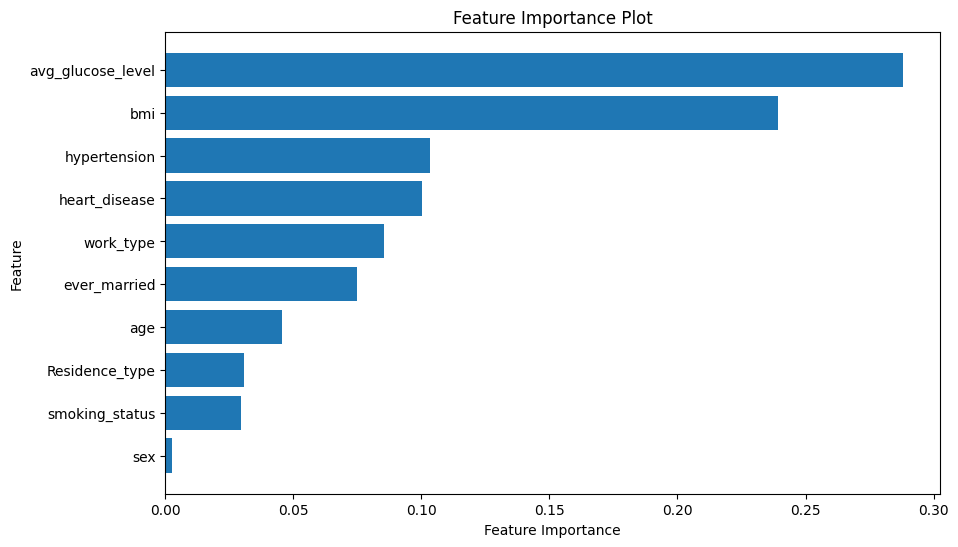

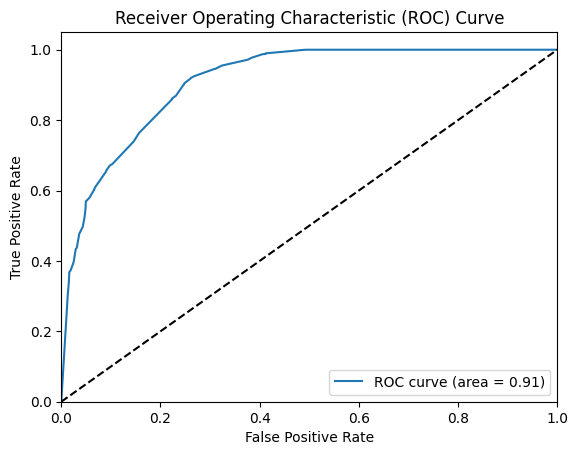

AUC Score: 0.9094811715481171


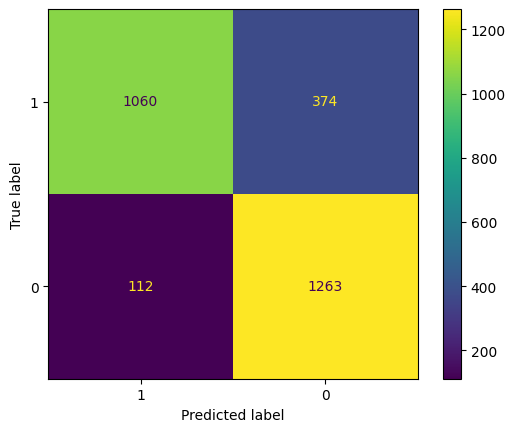

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.8683274021352313, 0.8220640569395018, 0.8078291814946619, 0.800711743772242, 0.8434163701067615, 0.8469750889679716, 0.7793594306049823, 0.8256227758007118, 0.8607142857142858]
Mean accuracy: 0.8252173360447381
95% confidence interval: (0.8042570552587878, 0.8461776168306885)


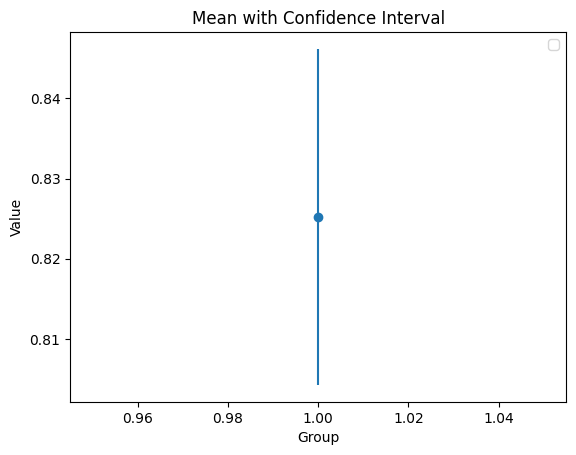

In [16]:
y_pred_prob_glucose_dt, y_test_glucose_dt, classification_report_dt_glucose, decision_tree = ML_algorithms.model_dt(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1434
           1       0.80      0.84      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809



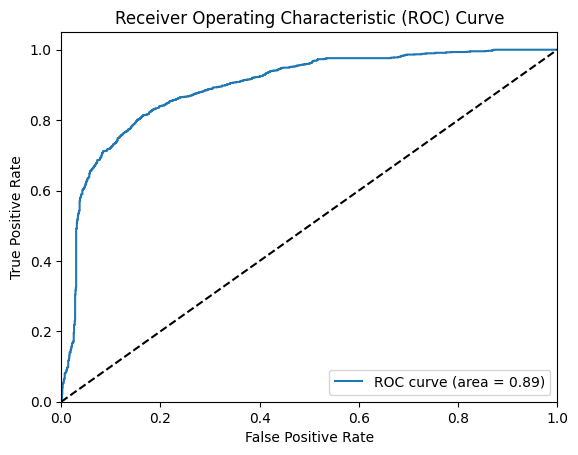

AUC Score: 0.8940012679092177


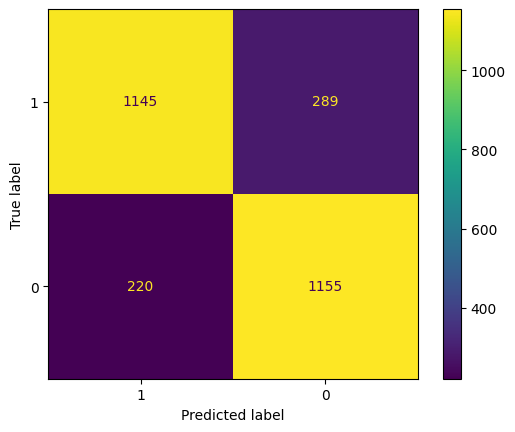

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7615658362989324, 0.7864768683274022, 0.7366548042704626, 0.7686832740213523, 0.7722419928825622, 0.7259786476868327, 0.7864768683274022, 0.8042704626334519, 0.797153024911032, 0.7964285714285714]
Mean accuracy: 0.7735930350788003
95% confidence interval: (0.7548904485310644, 0.7922956216265362)


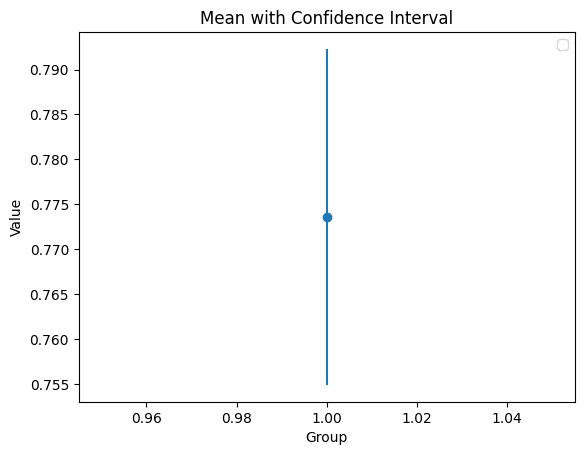

In [17]:
y_pred_prob_glucose_svm, y_test_glucose_svm, classification_report_svm_glucose, svm = ML_algorithms.model_svm(df_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [18]:
df_mean_glucose = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_glucose, 'avg_glucose_level')

Outliers found:


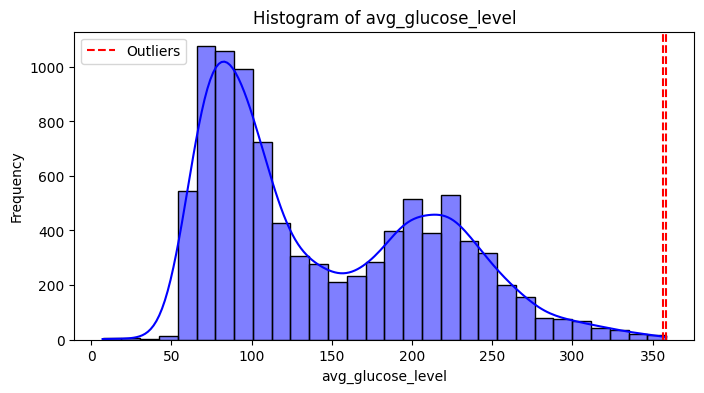

In [19]:
outliers_utils.visualize_outliers_specific(df_mean_glucose, 'avg_glucose_level')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1434
           1       0.77      0.92      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Node Labels:
 Annotation(0.541499, 0.954545, 'hypertension <= 0.5\nsamples = 6554\nvalue = [3333.0, 3221.0]\nclass = 0')


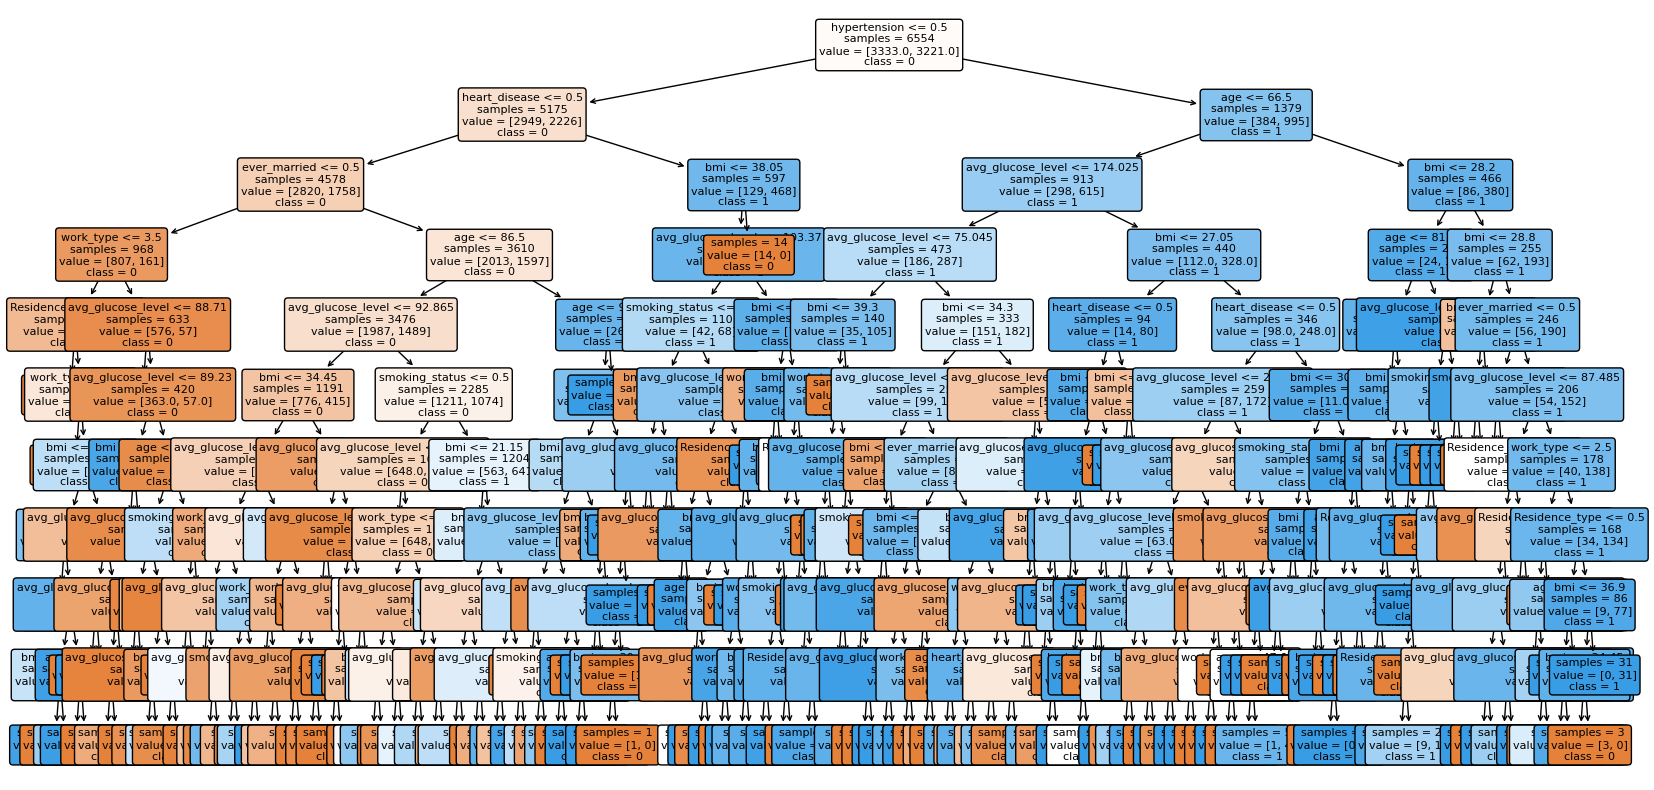

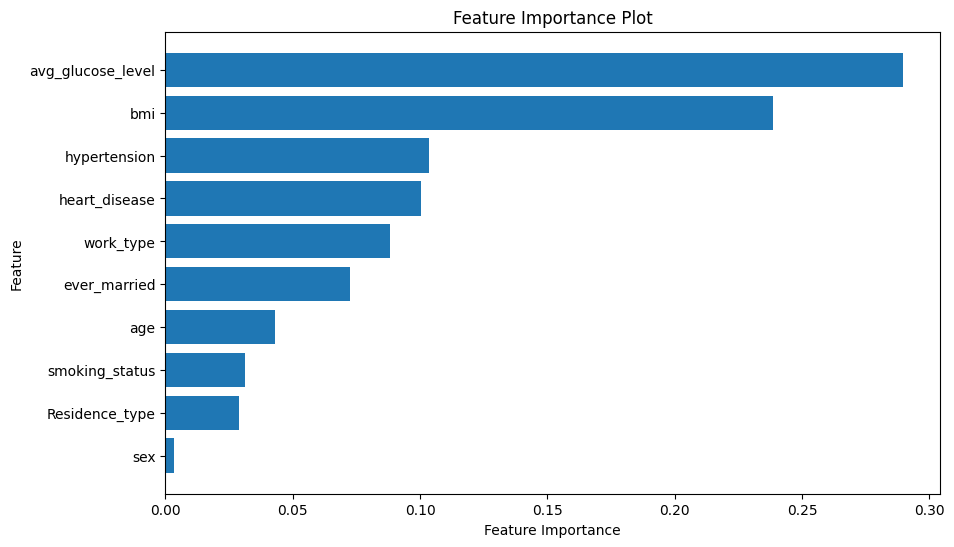

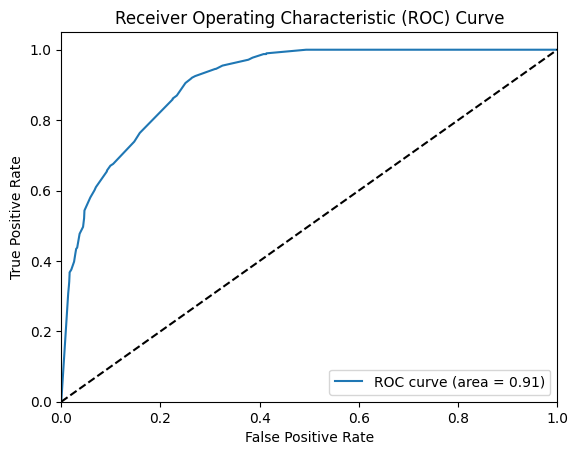

AUC Score: 0.9085994674781286


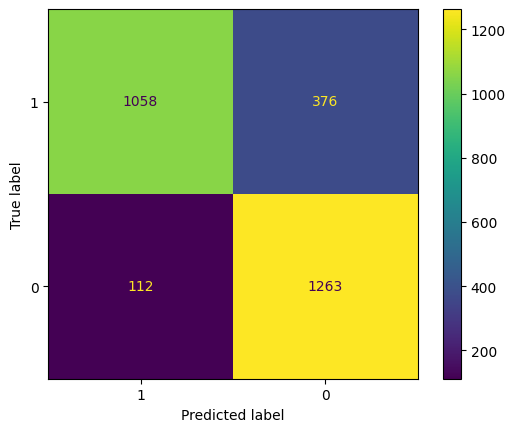

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8398576512455516, 0.7793594306049823, 0.8042704626334519, 0.8113879003558719, 0.8434163701067615, 0.7758007117437722, 0.8185053380782918, 0.8505338078291815, 0.8220640569395018, 0.8071428571428572]
Mean accuracy: 0.8152338586680224
95% confidence interval: (0.797157939288483, 0.8333097780475619)


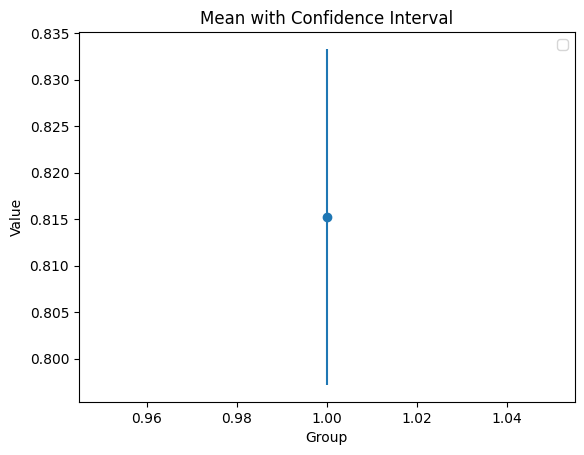

In [20]:
y_prob_dt_20_glucose, y_test_dt_20_glucose, classification_report_dt_20_glucose, decision_tree = ML_algorithms.model_dt(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 1, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1434
           1       0.80      0.84      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809



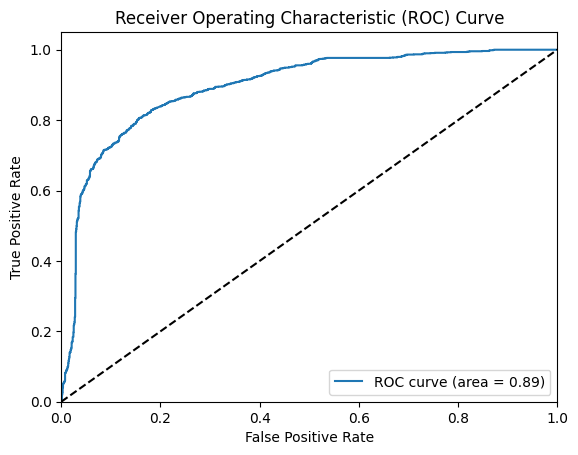

AUC Score: 0.8942695574996831


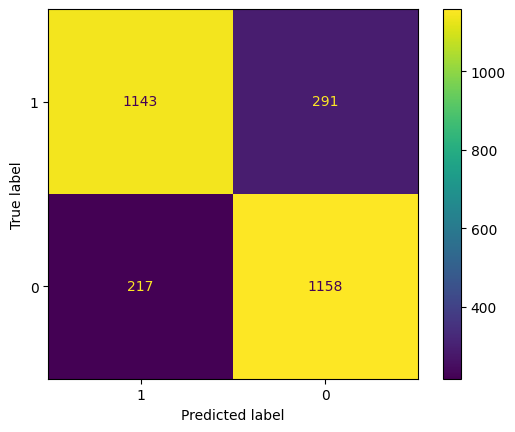

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7686832740213523, 0.7864768683274022, 0.7864768683274022, 0.7829181494661922, 0.7686832740213523, 0.8042704626334519, 0.7651245551601423, 0.7793594306049823, 0.7651245551601423, 0.7464285714285714]
Mean accuracy: 0.7753546009150991
95% confidence interval: (0.7639391873564318, 0.7867700144737664)


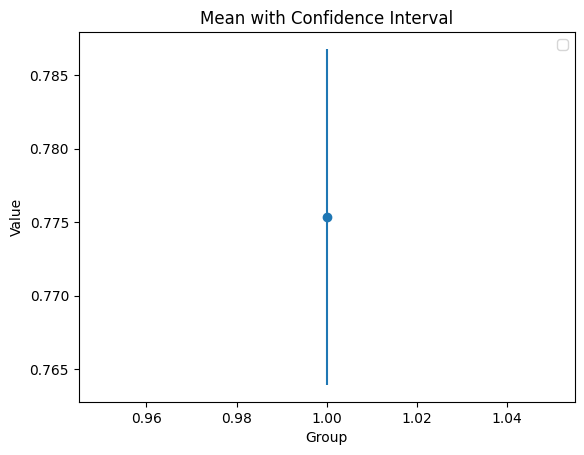

--------------------------------------


In [21]:
y_prob_svm_20_glucose, y_test_svm_20_glucose, classification_report_svm_20_glucose, svm = ML_algorithms.model_svm(df_mean_glucose, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

## bmi

In [22]:
df = df_clean.copy()

In [23]:
print('--------------------------------------')
outliers_utils.visualize_outliers_specific(df, 'bmi')

--------------------------------------
no outliers detected


In [24]:
df_bmi = outliers_utils.outliers_replace(df, 'bmi', 30)

Outliers found:


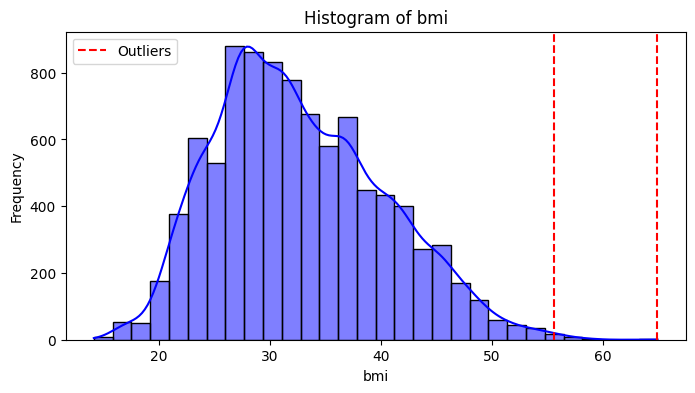

In [25]:
outliers_utils.visualize_outliers_specific(df_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1434
           1       0.91      0.66      0.76      1375

    accuracy                           0.80      2809
   macro avg       0.82      0.80      0.80      2809
weighted avg       0.82      0.80      0.80      2809

Node Labels:
 Annotation(0.537987, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3284, 3270]\nclass = 0')


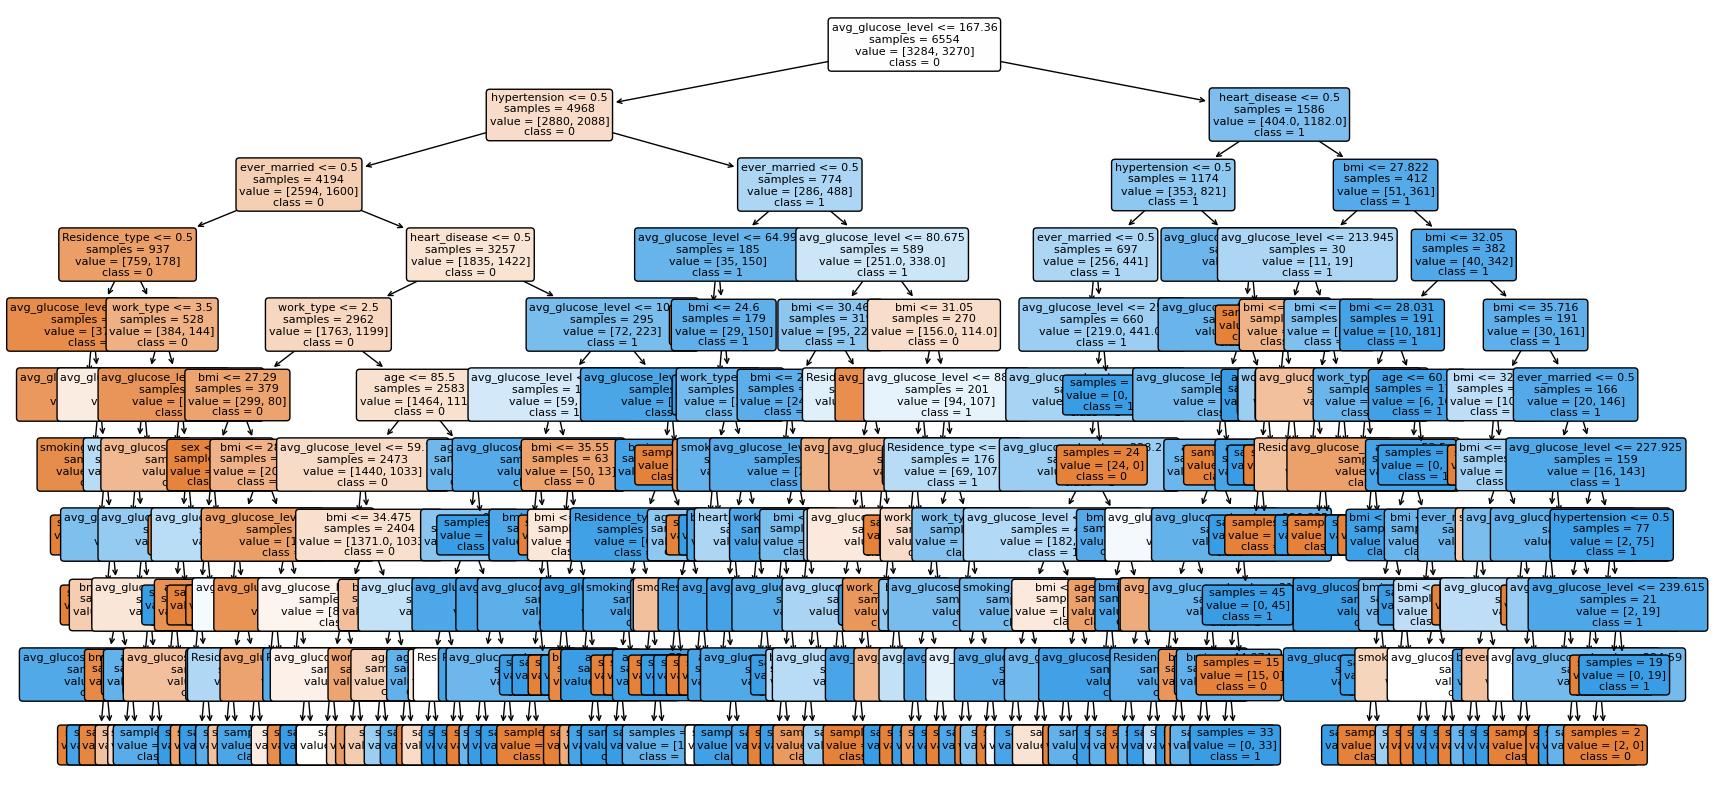

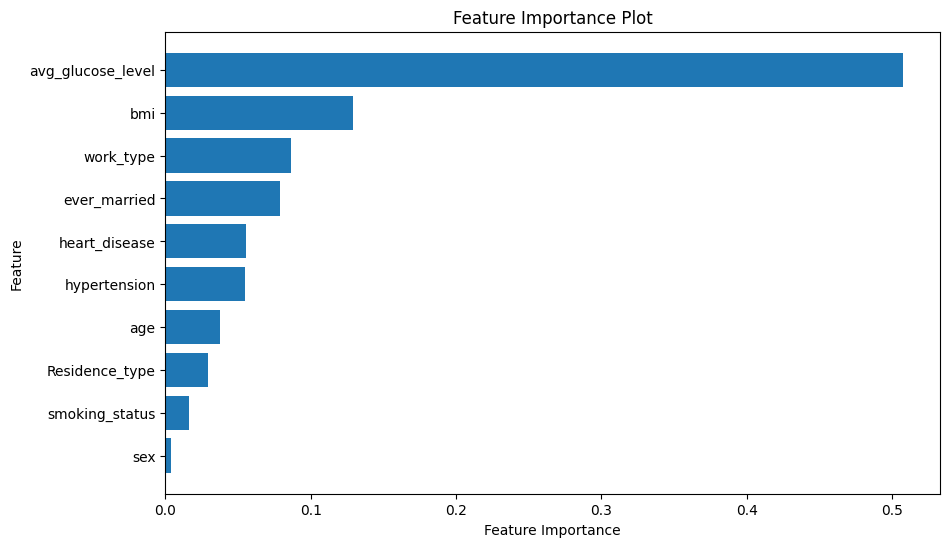

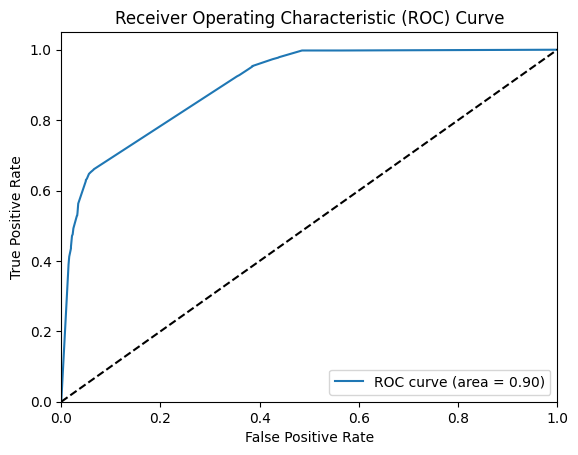

AUC Score: 0.9013318118422722


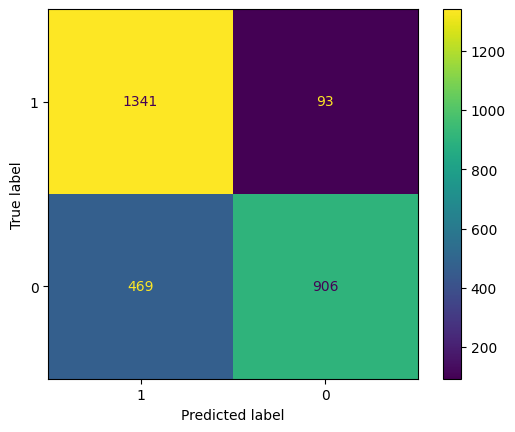

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8327402135231317, 0.8185053380782918, 0.8220640569395018, 0.8790035587188612, 0.8078291814946619, 0.8683274021352313, 0.7188612099644128, 0.8185053380782918, 0.7935943060498221, 0.85]
Mean accuracy: 0.8209430604982206
95% confidence interval: (0.7889926321163803, 0.852893488880061)


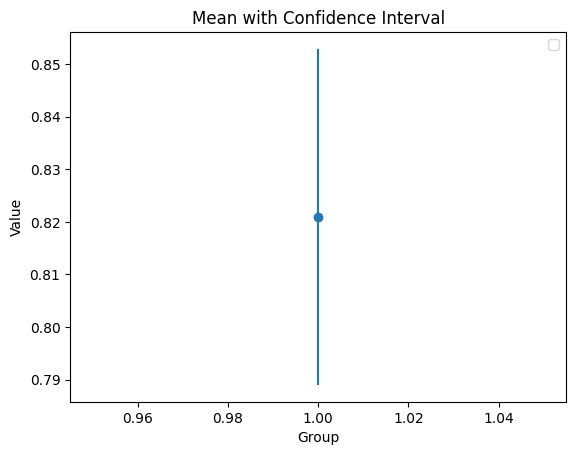

In [26]:
y_pred_prob_bmi_dt, y_test_bmi_dt, classification_report_dt_bmi, decision_tree = ML_algorithms.model_dt(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1434
           1       0.82      0.89      0.85      1375

    accuracy                           0.85      2809
   macro avg       0.85      0.85      0.85      2809
weighted avg       0.85      0.85      0.85      2809



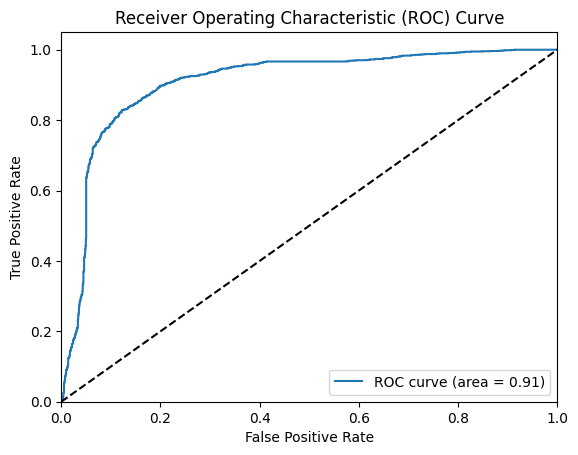

AUC Score: 0.9069970838087993


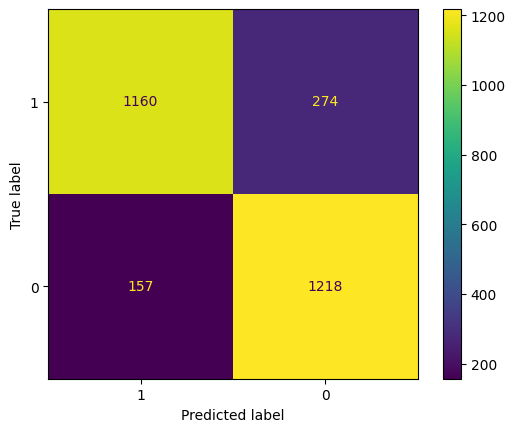

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.800711743772242, 0.7651245551601423, 0.7437722419928826, 0.8078291814946619, 0.8042704626334519, 0.7508896797153025, 0.7793594306049823, 0.7758007117437722, 0.7686832740213523, 0.7785714285714286]
Mean accuracy: 0.7775012709710218
95% confidence interval: (0.7619389886657857, 0.793063553276258)


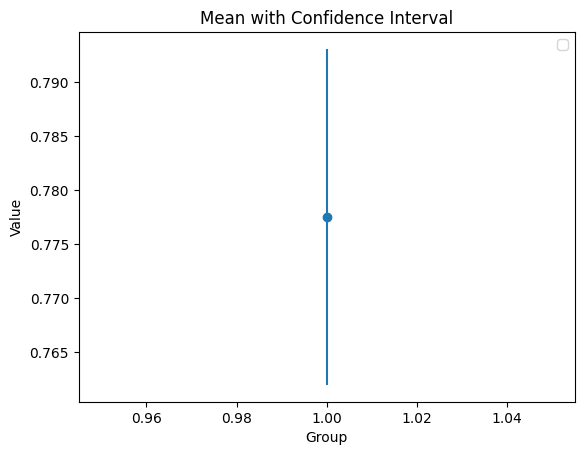

In [27]:
y_pred_prob_bmi_svm, y_test_bmi_svm, classification_report_svm_bmi, svm = ML_algorithms.model_svm(df_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)

### Outliers are transformed into values that at 20% above the mean

In [28]:
df_mean_bmi = outliers_utils.replace_outliers_with_above_mean_original(df_clean, df_bmi, 'bmi')

Outliers found:


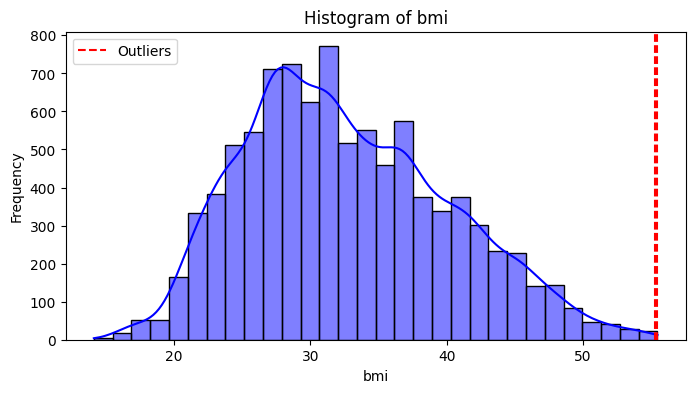

In [29]:
outliers_utils.visualize_outliers_specific(df_mean_bmi, 'bmi')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1434
           1       0.91      0.66      0.76      1375

    accuracy                           0.80      2809
   macro avg       0.82      0.80      0.80      2809
weighted avg       0.82      0.80      0.80      2809

Node Labels:
 Annotation(0.529507, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3284, 3270]\nclass = 0')


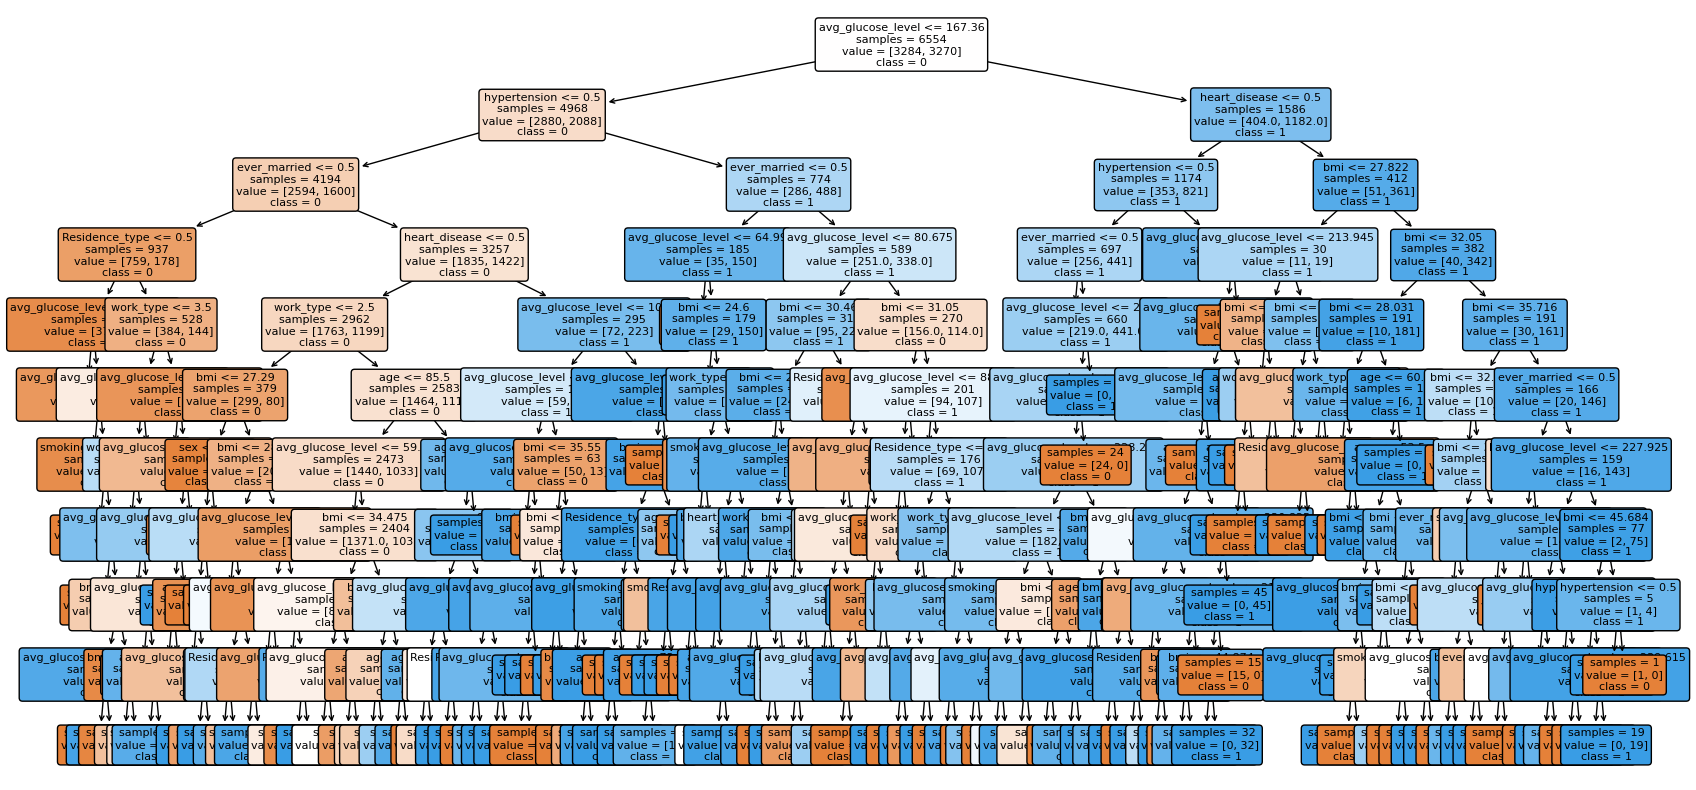

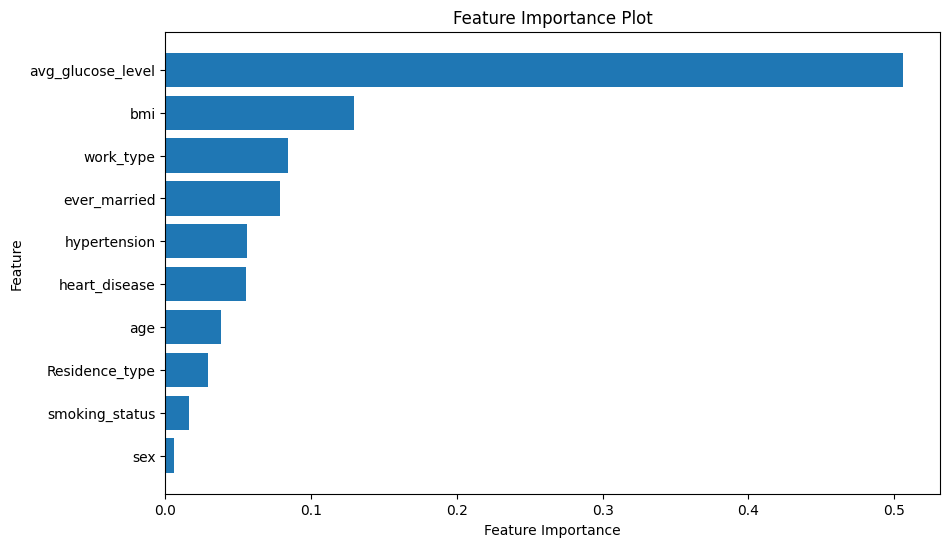

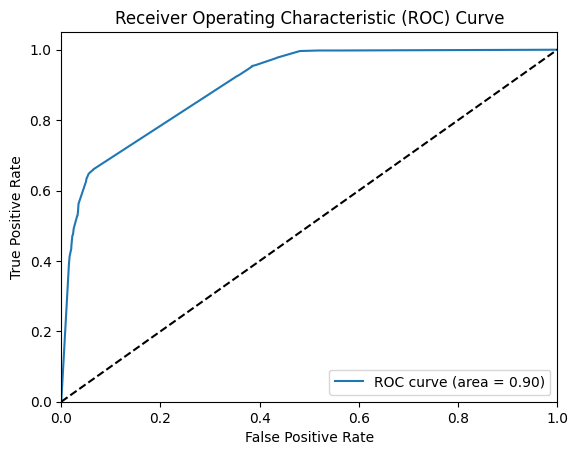

AUC Score: 0.9012199822492709


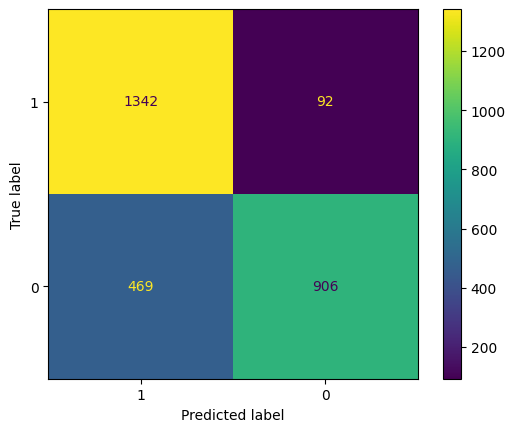

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.797153024911032, 0.8149466192170819, 0.8576512455516014, 0.8327402135231317, 0.8042704626334519, 0.797153024911032, 0.800711743772242, 0.8718861209964412, 0.797153024911032, 0.8214285714285714]
Mean accuracy: 0.8195094051855618
95% confidence interval: (0.8003103998966863, 0.8387084104744373)


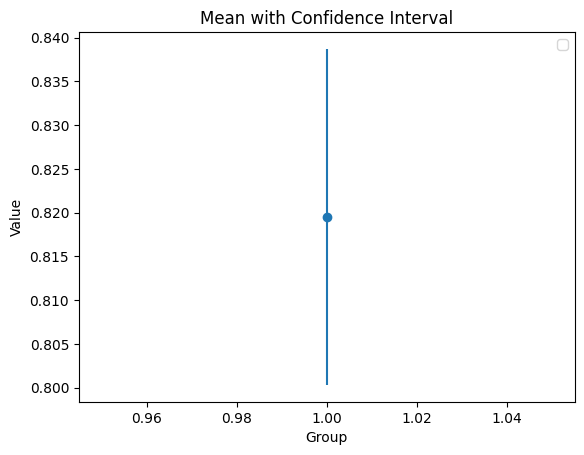

In [30]:
y_prob_dt_20_bmi, y_test_dt_20_bmi, classification_report_dt_20_bmi, decision_tree = ML_algorithms.model_dt(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1434
           1       0.82      0.89      0.85      1375

    accuracy                           0.85      2809
   macro avg       0.85      0.85      0.85      2809
weighted avg       0.85      0.85      0.85      2809



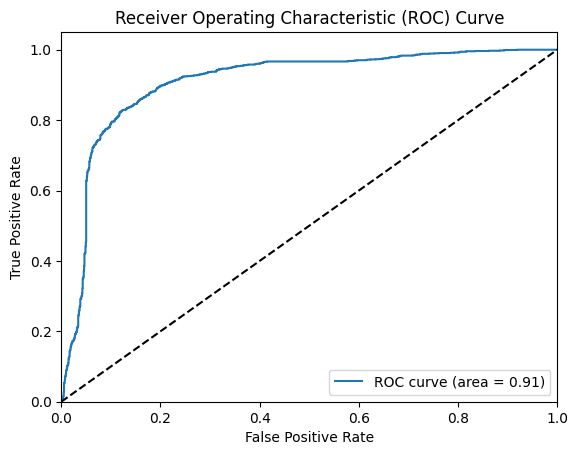

AUC Score: 0.9072762774185368


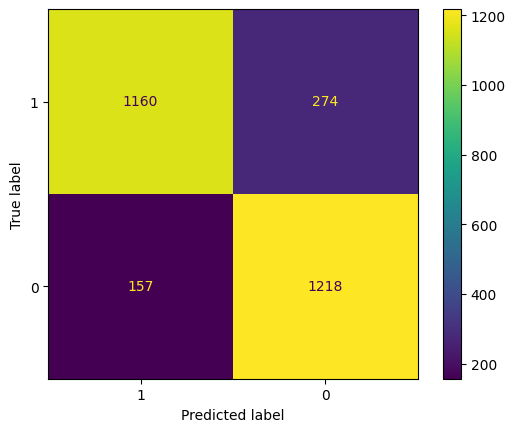

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8149466192170819, 0.7437722419928826, 0.7793594306049823, 0.800711743772242, 0.7153024911032029, 0.797153024911032, 0.8149466192170819, 0.797153024911032, 0.7793594306049823, 0.775]
Mean accuracy: 0.7817704626334521
95% confidence interval: (0.7592084709427382, 0.8043324543241659)


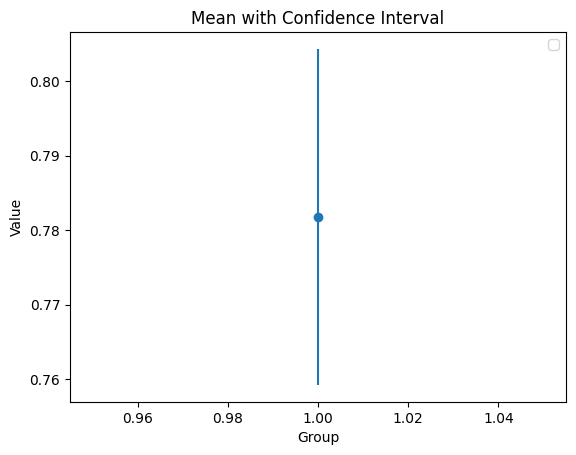

--------------------------------------


In [31]:
y_prob_svm_20_bmi, y_test_svm_20_bmi, classification_report_svm_20_bmi, svm = ML_algorithms.model_svm(df_mean_bmi, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm, df_clean)
print('--------------------------------------')

# Categorical

In [32]:
df = df_clean.copy()

--------------------------------------
Value counts:
work_type
4    5833
3    2123
2    1265
1     122
0      20
Name: count, dtype: int64
Outliers detected: [4, 3, 2, 1, 0]
Outliers found:


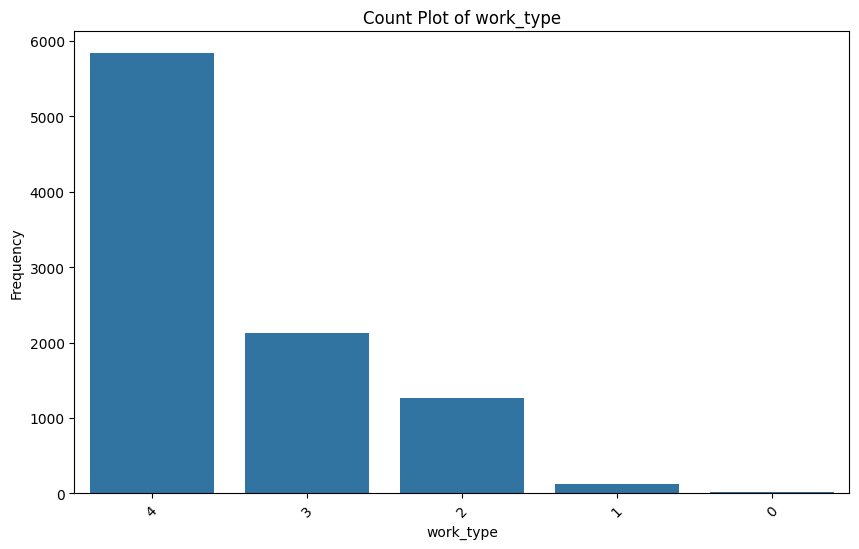

In [33]:
print('--------------------------------------')
outliers_utils.visualize_outliers_categorical(df, 'work_type')

In [34]:
df_categorical = outliers_utils.add_categorical_outliers('work_type', 30, df)

Least frequent value:  0


Value counts:
work_type
4    4098
0    2824
3    1459
2     900
1      82
Name: count, dtype: int64
Outliers detected: [4, 0, 3, 2, 1]
Outliers found:


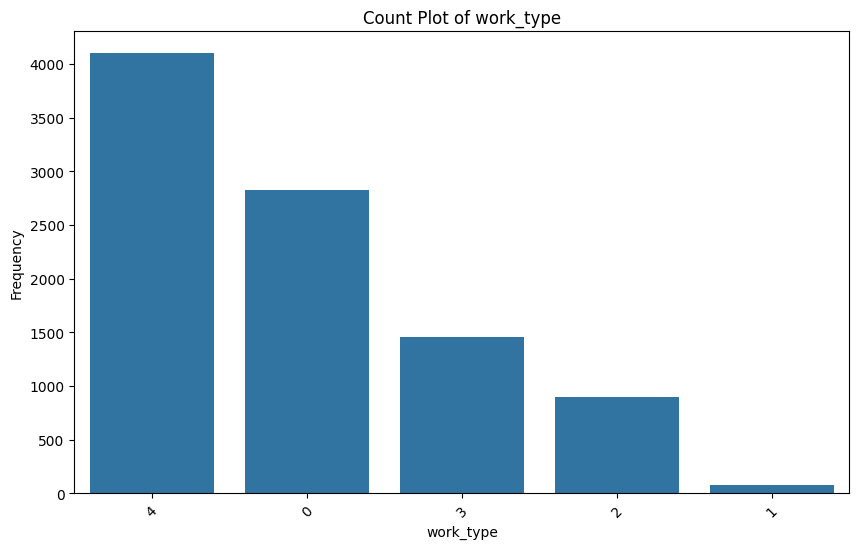

In [35]:
outliers_utils.visualize_outliers_categorical(df_categorical, 'work_type')

**Decision Tree**

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1434
           1       0.78      0.88      0.83      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Node Labels:
 Annotation(0.645286, 0.954545, 'avg_glucose_level <= 167.36\nsamples = 6554\nvalue = [3299, 3255]\nclass = 0')


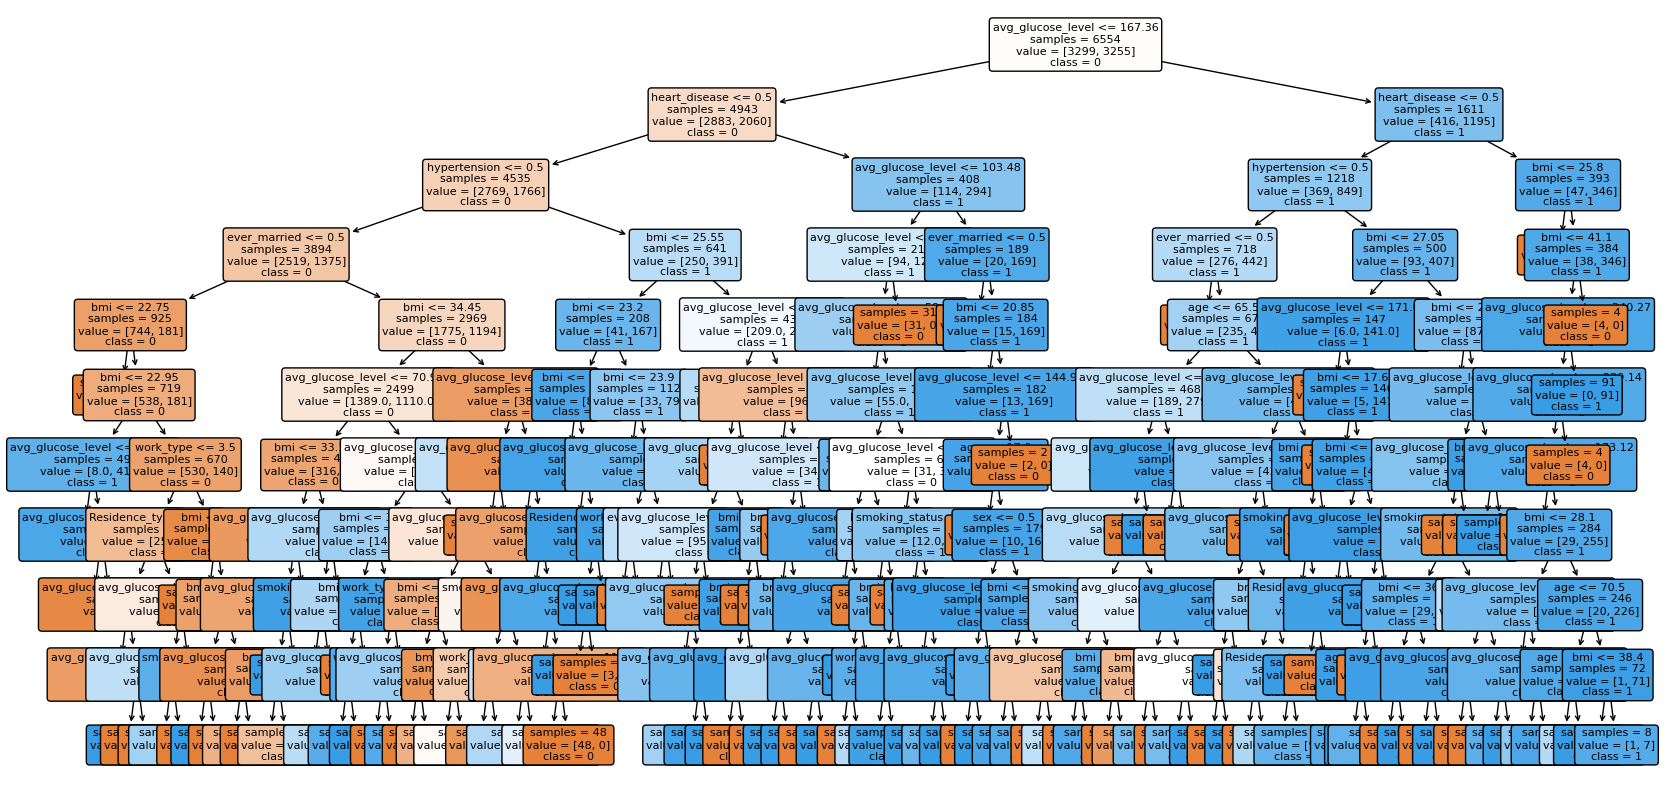

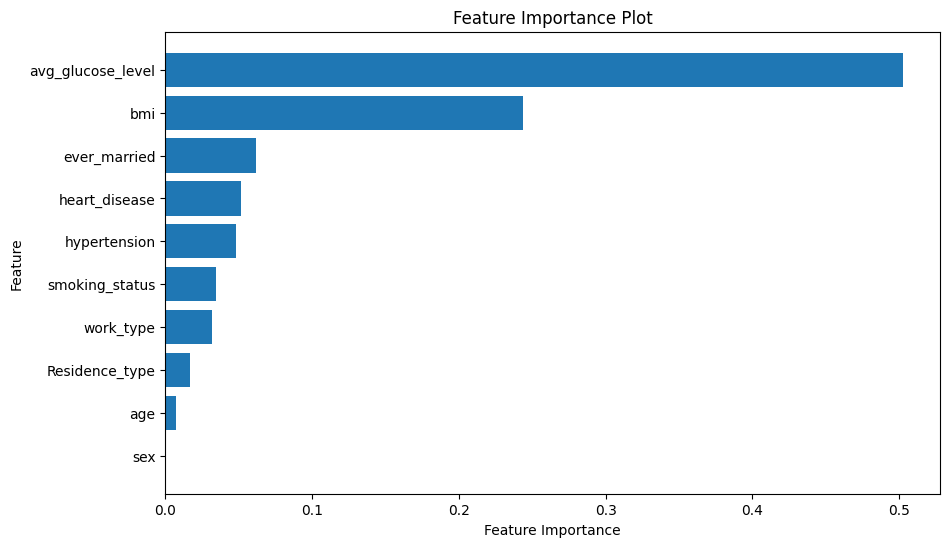

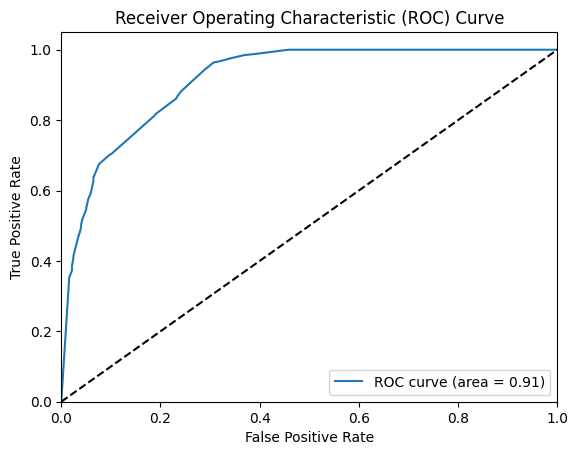

AUC Score: 0.9139667807784962


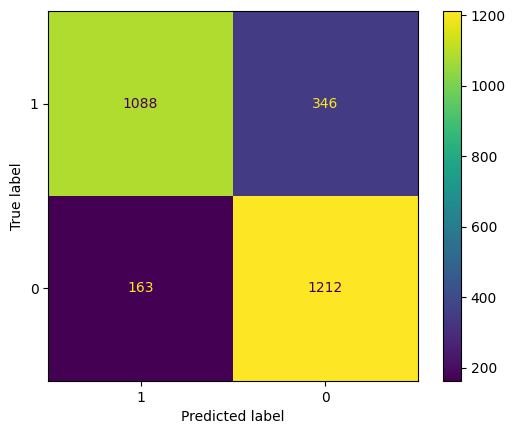

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8291814946619217, 0.8113879003558719, 0.7935943060498221, 0.800711743772242, 0.8185053380782918, 0.8362989323843416, 0.8291814946619217, 0.7473309608540926, 0.8398576512455516, 0.8392857142857143]
Mean accuracy: 0.8145335536349771
95% confidence interval: (0.794120882461028, 0.8349462248089263)


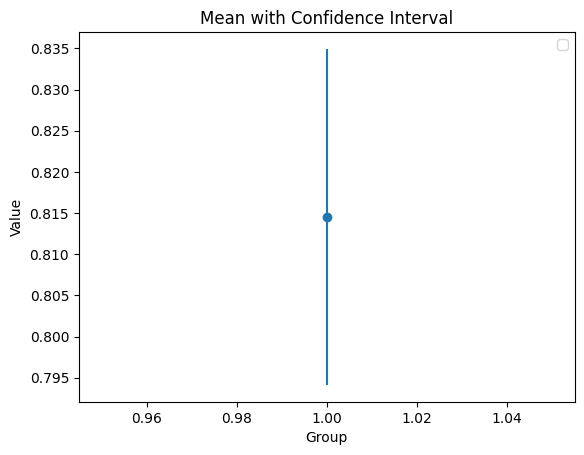

In [36]:
y_pred_prob_categorical_dt, y_test_categorical_dt, classification_report_dt_categorical, decision_tree = ML_algorithms.model_dt(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_clean)

**Support Vector Machine**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'classifier__C': 10, 'classifier__gamma': 1}
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1434
           1       0.77      0.86      0.81      1375

    accuracy                           0.80      2809
   macro avg       0.81      0.81      0.80      2809
weighted avg       0.81      0.80      0.80      2809



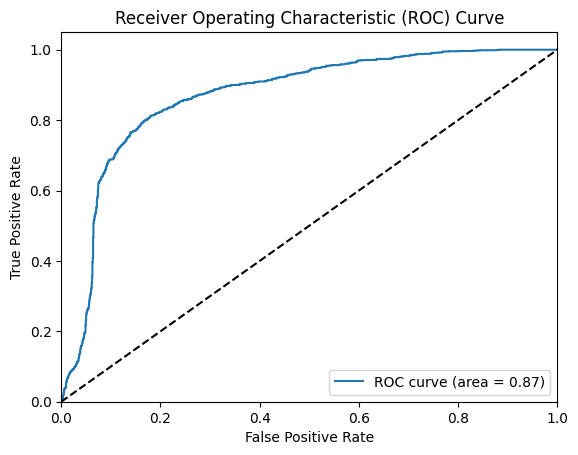

AUC Score: 0.867878787878788


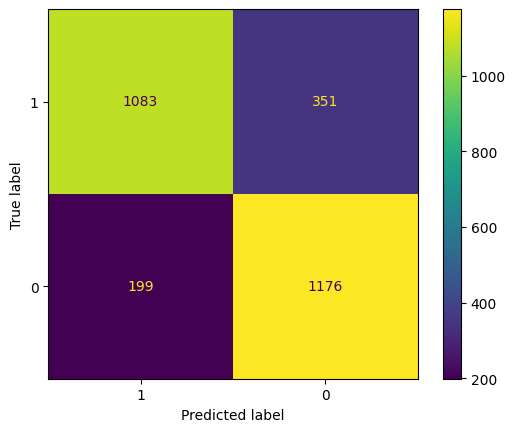

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.7864768683274022, 0.7864768683274022, 0.7580071174377224, 0.8042704626334519, 0.7615658362989324, 0.7544483985765125, 0.7722419928825622, 0.7651245551601423, 0.7402135231316725, 0.775]
Mean accuracy: 0.7703825622775802
95% confidence interval: (0.7570765332382369, 0.7836885913169235)


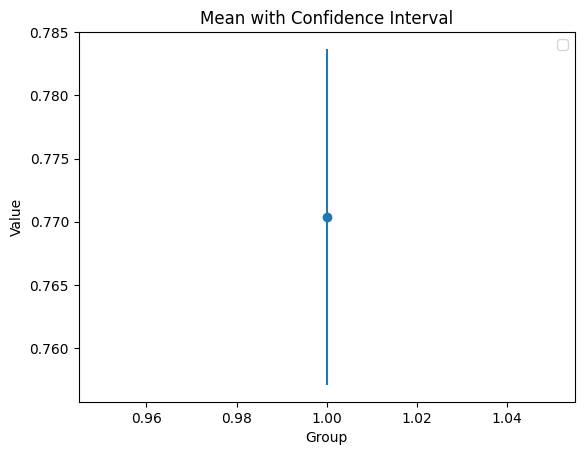

--------------------------------------


In [37]:
y_pred_prob_categorical_svm, y_test_categorical_svm, classification_report_svm_categorical, svm = ML_algorithms.model_svm(df_categorical, df_clean)
ML_algorithms.k_fold_cross_validation_dt(svm,df_clean)

print('--------------------------------------')

## Conclusion

### ROC Curve

**Decision Tree**

Decision Tree


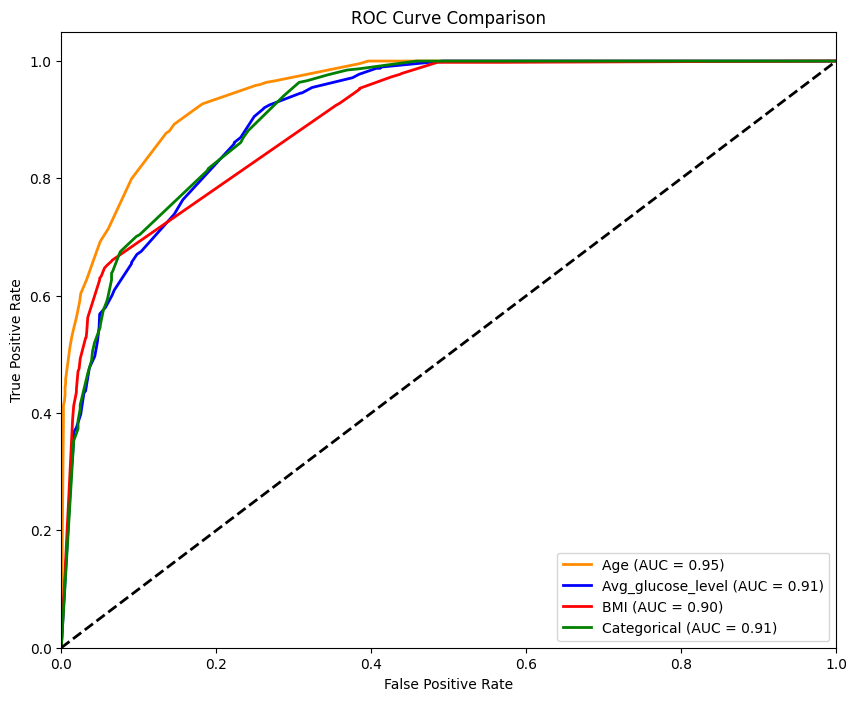

In [38]:
roc_results = [
    (y_pred_prob_age_dt, y_test_age_dt, 'Age'),
    (y_pred_prob_glucose_dt, y_test_glucose_dt, 'Avg_glucose_level'),
    (y_pred_prob_bmi_dt, y_test_bmi_dt, 'BMI'),
    (y_pred_prob_categorical_dt, y_test_categorical_dt, 'Categorical')
]

print('Decision Tree')
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Decision Tree - substitution of outliers**

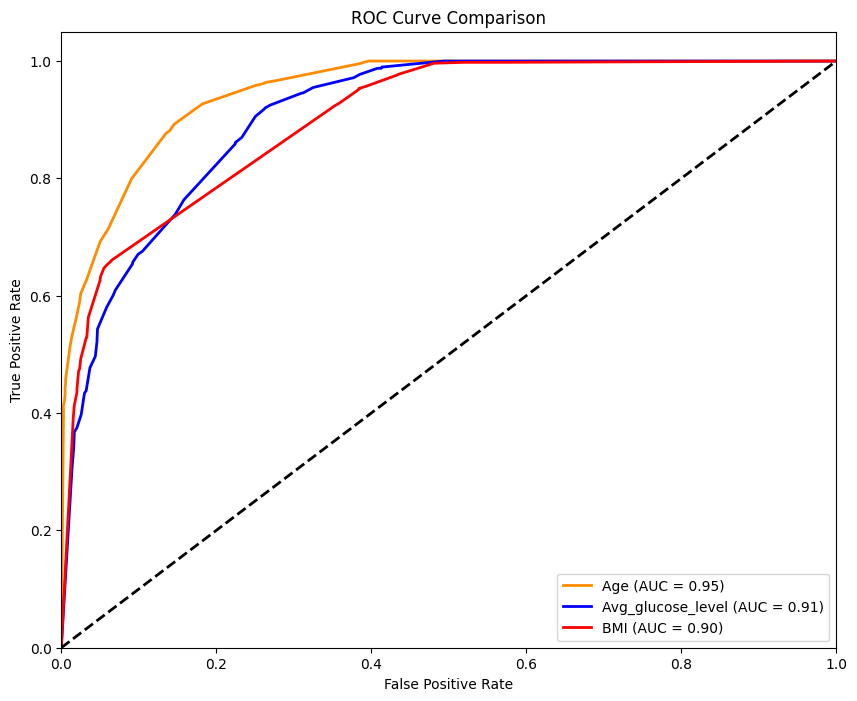

In [39]:
roc_results = [
    (y_prob_dt_20_age, y_test_dt_20_age, 'Age'),
    (y_prob_dt_20_glucose, y_test_dt_20_glucose, 'Avg_glucose_level'),
    (y_prob_dt_20_bmi, y_test_dt_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine**

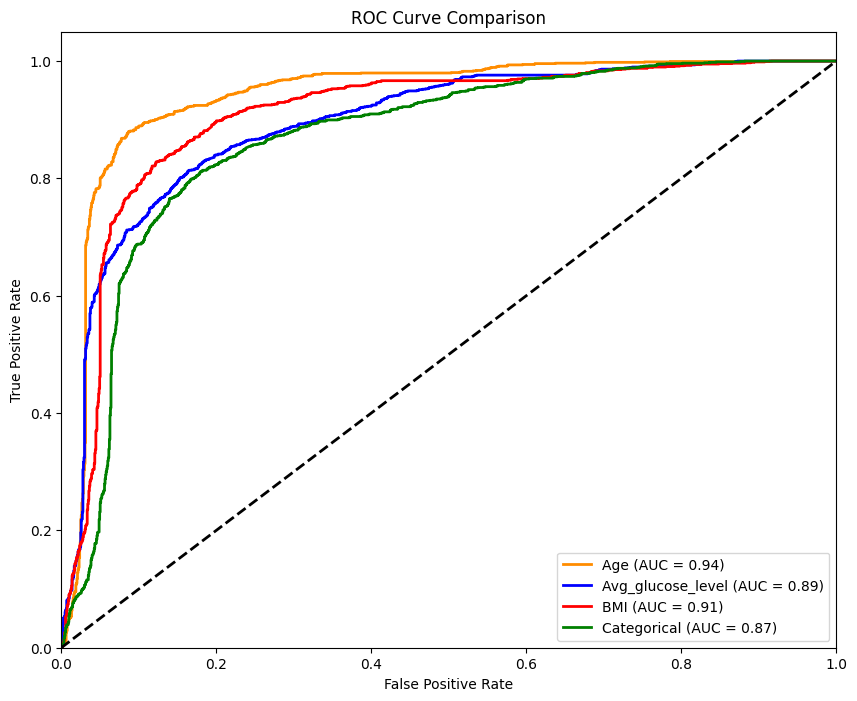

In [40]:
roc_results = [
    (y_pred_prob_age_svm, y_test_age_svm, 'Age'),
    (y_pred_prob_glucose_svm, y_test_glucose_svm, 'Avg_glucose_level'),
    (y_pred_prob_bmi_svm, y_test_bmi_svm, 'BMI'),
    (y_pred_prob_categorical_svm, y_test_categorical_svm, 'Categorical')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

**Support Vector Machine - substitution of outliers**

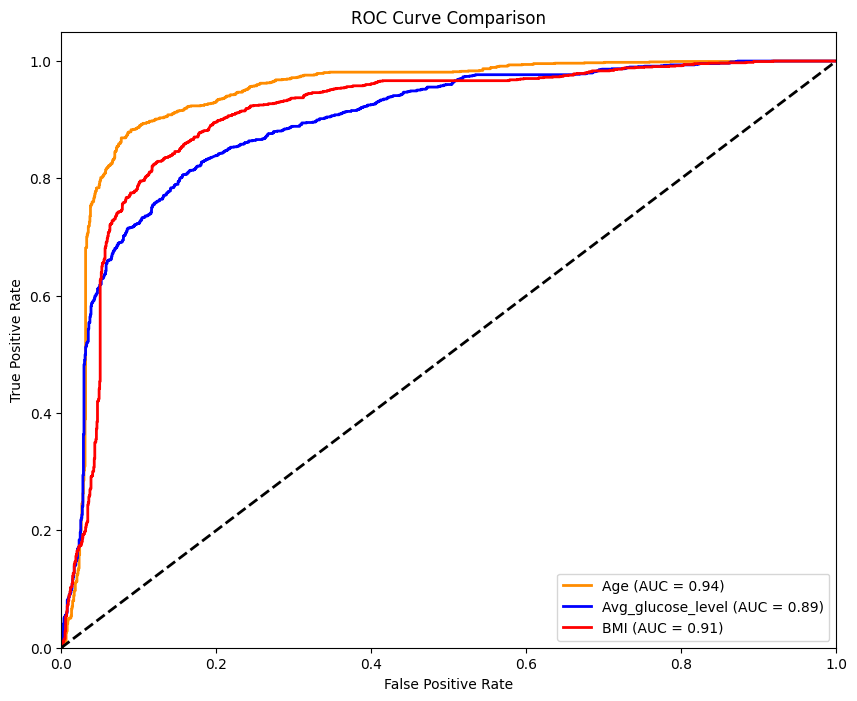

In [41]:
roc_results = [
    (y_prob_svm_20_age, y_test_svm_20_age, 'Age'),
    (y_prob_svm_20_glucose, y_test_svm_20_glucose, 'Avg_glucose_level'),
    (y_prob_svm_20_bmi, y_test_svm_20_bmi, 'BMI')
]
# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Classification report

**Decision Tree**

In [42]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_bmi)
print('Classification report - Decision Tree - Categorical')
print(classification_report_dt_categorical)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1434
           1       0.83      0.92      0.88      1375

    accuracy                           0.87      2809
   macro avg       0.88      0.87      0.87      2809
weighted avg       0.88      0.87      0.87      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1434
           1       0.77      0.92      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1434
           1       0.91      0.66      0.76      1375

    accuracy                        

**Decision Tree - substitution of outliers**

In [43]:
print('Classification report - Decision Tree - Age')
print(classification_report_dt_20_age)
print('Classification report - Decision Tree - Avg_glucose_level')
print(classification_report_dt_20_glucose)
print('Classification report - Decision Tree - BMI')
print(classification_report_dt_20_bmi)

Classification report - Decision Tree - Age
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1434
           1       0.83      0.92      0.88      1375

    accuracy                           0.87      2809
   macro avg       0.88      0.87      0.87      2809
weighted avg       0.88      0.87      0.87      2809

Classification report - Decision Tree - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1434
           1       0.77      0.92      0.84      1375

    accuracy                           0.83      2809
   macro avg       0.84      0.83      0.83      2809
weighted avg       0.84      0.83      0.83      2809

Classification report - Decision Tree - BMI
              precision    recall  f1-score   support

           0       0.74      0.94      0.83      1434
           1       0.91      0.66      0.76      1375

    accuracy                        

**Support Vector Machine**

In [44]:
print('Classification report - SVM - Age')
print(classification_report_svm_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_bmi)
print('Classification report - SVM - Categorical')
print(classification_report_svm_categorical)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1434
           1       0.87      0.91      0.89      1375

    accuracy                           0.89      2809
   macro avg       0.89      0.89      0.89      2809
weighted avg       0.89      0.89      0.89      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1434
           1       0.80      0.84      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1434
           1       0.82      0.89      0.85      1375

    accuracy                           0.85      2809
   macro avg

**Support Vector Machine - substitution of outliers**

In [45]:
print('Classification report - SVM - Age')
print(classification_report_svm_20_age)
print('Classification report - SVM - Avg_glucose_level')
print(classification_report_svm_20_glucose)
print('Classification report - SVM - BMI')
print(classification_report_svm_20_bmi)

Classification report - SVM - Age
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1434
           1       0.86      0.91      0.88      1375

    accuracy                           0.88      2809
   macro avg       0.88      0.88      0.88      2809
weighted avg       0.89      0.88      0.88      2809

Classification report - SVM - Avg_glucose_level
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1434
           1       0.80      0.84      0.82      1375

    accuracy                           0.82      2809
   macro avg       0.82      0.82      0.82      2809
weighted avg       0.82      0.82      0.82      2809

Classification report - SVM - BMI
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1434
           1       0.82      0.89      0.85      1375

    accuracy                           0.85      2809
   macro avg